In [1]:
#%pip install vizdoom

In [65]:
from vizdoom import *
import gym
from gym import Env
from gym.spaces import Box, Discrete
import cv2
import random
import time
import numpy as np
from matplotlib import pyplot as plt

In [2]:
game = DoomGame()
game.load_config('github/ViZDoom/scenarios/basic.cfg')
game.init()

In [3]:
for episode in range(5):
    game.new_episode()
    while not game.is_episode_finished():
        state = game.get_state()
        img = state.screen_buffer
        info = state.game_variables
        reward = game.make_action(random.choice(np.identity(3, dtype=np.uint8)))
        print(f'reward: {reward}')
        time.sleep(0.02)
    print(f"Result: {game.get_total_reward()}")
game.close()

reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -6.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -6.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -6.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -6.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0
reward: -1.0

In [75]:
class VizDoomGym(Env):
    def __init__(self, render=False):
        super().__init__()
        self.game = DoomGame()
        self.game.load_config('github/ViZDoom/scenarios/basic.cfg')
        
        if render == False:
            self.game.set_window_visible(False)
        else:
            self.game.set_window_visible(True)
        self.game.init()
        
        self.observation_space = Box(low=0, high=255, shape=(100, 160, 1), dtype=np.uint8)
        self.action_space = Discrete(3)
        
    def step(self, action):
        actions = np.identity(3, dtype=np.uint8)
        reward = self.game.make_action(actions[action])
        
        if self.game.get_state():
            state = self.game.get_state().screen_buffer
            state = self.grayscale(state)
            info = self.game.get_state().game_variables
        else:
            state = np.zeros(self.observation_space.shape)
            info = 0
        done = self.game.is_episode_finished()
        
        return state, reward, done, info
    
    def render():
        pass
    
    def reset(self):
        self.game.new_episode()
        state = self.game.get_state().screen_buffer
        return self.grayscale(state)
    
    def grayscale(self, observation):
        gray = cv2.cvtColor(np.moveaxis(observation, 0, -1), cv2.COLOR_BGR2GRAY)
        resize = cv2.resize(gray, (160,  100), interpolation=cv2.INTER_CUBIC)
        state = np.reshape(resize, (100, 160, 1))
        return state
    
    def close(self):
        self.game.close()

In [76]:
env = VizDoomGym(render=True)

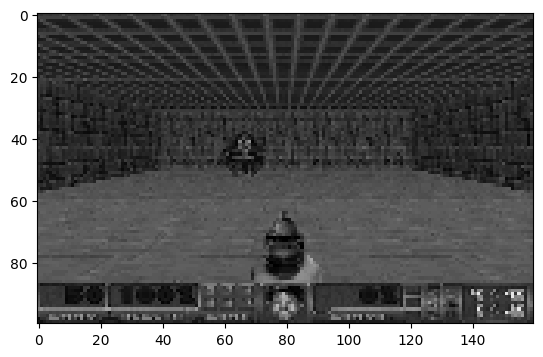

In [108]:
plt.imshow(cv2.cvtColor(env.reset(), cv2.COLOR_BGR2RGB))

In [109]:
env.close()